# Исследование и оптимизация системы контроля

In [12]:
from load_packages import load_packages

load_packages()

## Имитационная модель СМО Эрланга

In [13]:
from packages.control_system.src.erlang_model import ErlangModel

flows = (4, 3)

def get_erlang_model(produce=4, control=3):
    return ErlangModel(produce, control)

def arrange_stats(model, flows, channels):
    return { 
        "produce_flow": flows[0],
        "control_flow": flows[1],
        "channels": channels,
        "ratio": model.arrange_stats(channels)
    }

In [14]:
for i in range(1, 5):
    print(arrange_stats(get_erlang_model(flows[0], flows[1]), flows, i))

{'produce_flow': 4, 'control_flow': 3, 'channels': 1, 'ratio': 0.4285714285714286}
{'produce_flow': 4, 'control_flow': 3, 'channels': 2, 'ratio': 0.7241379310344828}
{'produce_flow': 4, 'control_flow': 3, 'channels': 3, 'ratio': 0.8907849829351536}
{'produce_flow': 4, 'control_flow': 3, 'channels': 4, 'ratio': 0.964873765093304}


## Имитационная модель системы контроля

In [16]:
from packages.control_system.src.channel_manager import ChannelManager
from packages.control_system.src.time_bound import TimeBound

from packages.control_system.src.control_model import ControlModel
from control_system.control_model import analyze

def get_control_model(produce = (8, 18), control = (18, 28), count = 1) -> ControlModel:
    return ControlModel(ChannelManager(count), TimeBound(produce), TimeBound(control))

def arrange_stats(model, sample, ratio):
    return analyze(model, sample, ratio)

In [17]:
from packages.control_system.src.model_stats import ModelStats

def show_stats(model, sample: int, ratio: float):
    stats = arrange_stats(model, sample, ratio)
    
    print("Channels: \t{0}".format(stats.channels))
    
    print("Sample: \t{0}".format(sample))
    print("Missed: \t{0}".format(stats.missed))
    print("Ratio: \t{0}\n".format(stats.ratio))

In [18]:
for ratio in [0.8, 0.98]:
    show_stats(get_control_model(), 50, ratio)

Channels: 	2
Sample: 	50
Missed: 	6
Ratio: 	0.88

Channels: 	3
Sample: 	50
Missed: 	0
Ratio: 	1.0



In [19]:
import numpy as np
import matplotlib.pyplot as plt

def show_bar(keys, values, precision: int = 3):
    keys = list(map(lambda x: str(x), keys))
    values = list(map(lambda x: round(x, precision), values))
    
    bars = plt.bar(keys, values)
    
    plt.show()

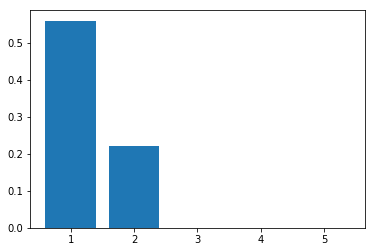

Channels: 	3
Sample: 	50
Missed: 	0
Ratio: 	1.0



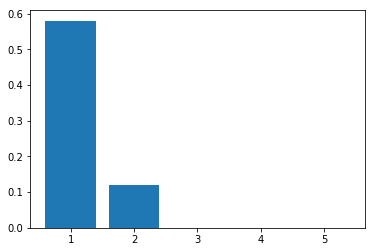

Channels: 	3
Sample: 	50
Missed: 	0
Ratio: 	1.0



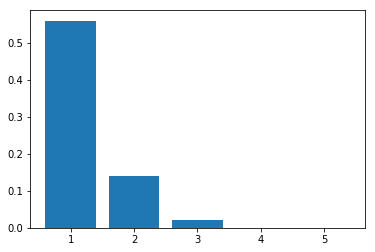

Channels: 	3
Sample: 	50
Missed: 	0
Ratio: 	1.0



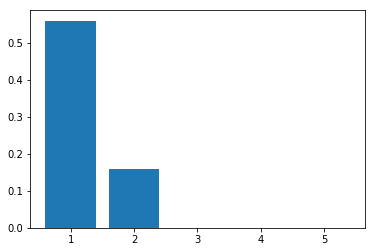

Channels: 	3
Sample: 	50
Missed: 	0
Ratio: 	1.0



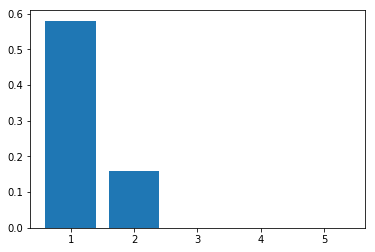

Channels: 	3
Sample: 	50
Missed: 	0
Ratio: 	1.0



In [20]:
def show_bars(bounds = (1, 5), sample: int = 50):
    """
    @bounds: min and max bounds of channels count
    """
    
    keys = []
    values = []
    
    for channels in range(bounds[0], bounds[1] + 1):
        stats = get_control_model(count=channels).arrange_stats(sample)
        
        keys.append(channels)
        values.append(1 - stats.ratio)
        
    show_bar(keys, values)
    
    show_stats(get_control_model(), sample, 0.98)
    
for i in range(0,5):
    show_bars()

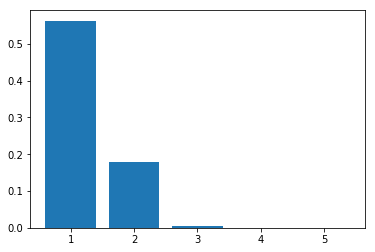

Channels: 	3
Sample: 	999
Missed: 	3
Ratio: 	0.996996996996997



In [10]:
show_bars(bounds=(1, 5), sample=999)